In [1]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.tools.plotting import scatter_matrix
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA")+"/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

In [5]:
nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

In [6]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


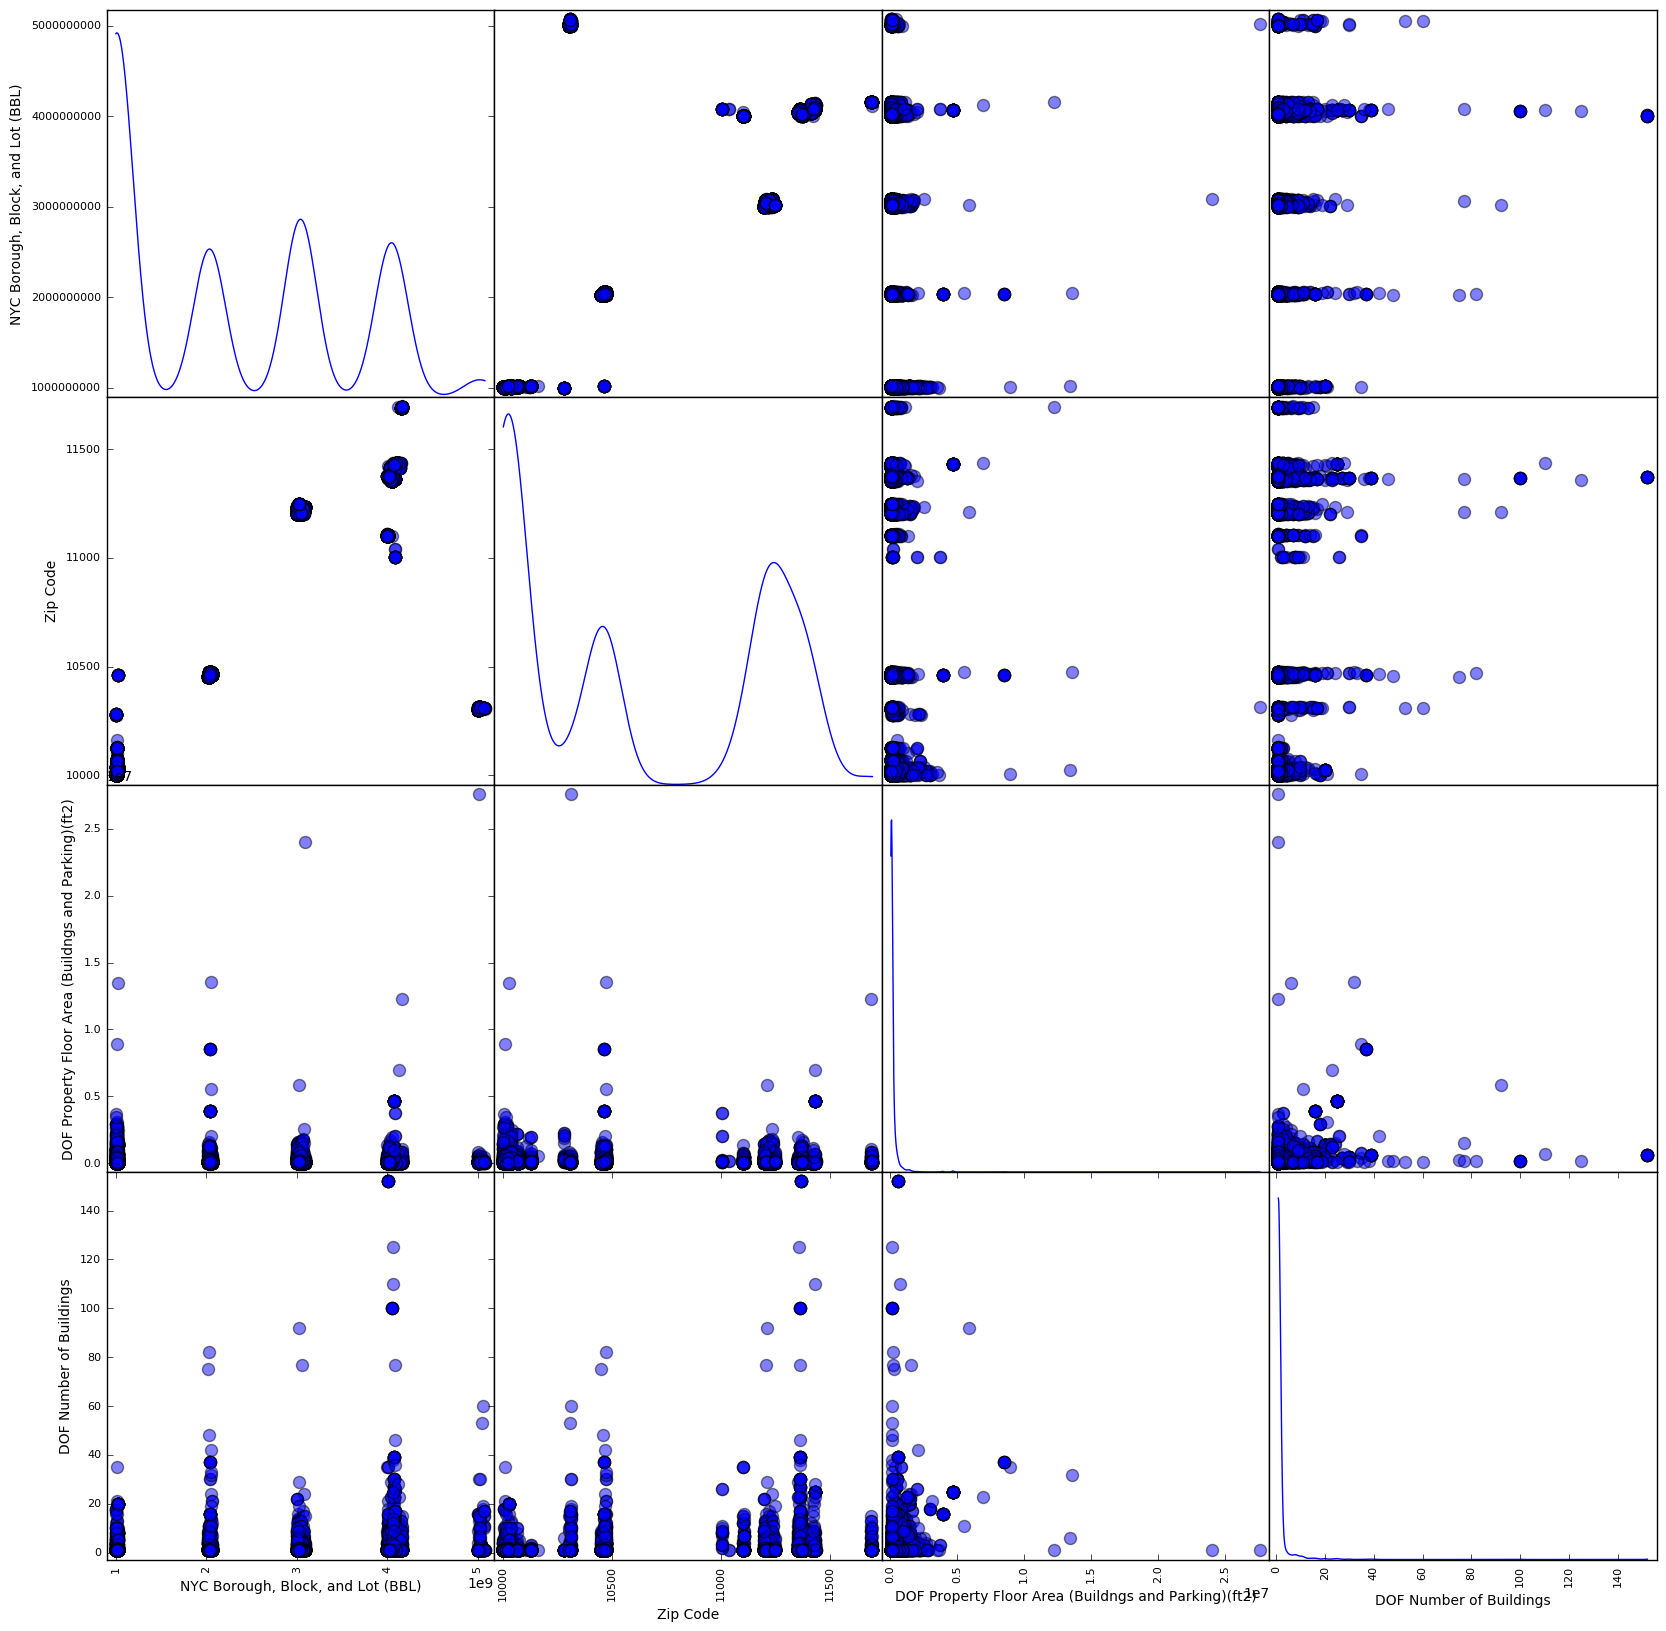

In [8]:
scatter_matrix (nrg, s=300, figsize=(20, 20), diagonal='kde')
pl.show()

In [11]:
nrg["Site EUI(kBtu/ft2)"] = pd.to_numeric(nrg["Site EUI(kBtu/ft2)"], errors="coerce")
nrg["Reported Property Floor Area (Building(s)) (ft²)"] = pd.to_numeric(nrg["Reported Property Floor Area (Building(s)) (ft²)"], errors="coerce")

In [19]:
def getzip():
    os.system("mkdir " + os.getenv("PUIDATA")+"/Manhattan")
    os.system("curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip")
    os.system("mv " + "mn_mappluto_16v1.zip " + os.getenv("PUIDATA")+"/Manhattan")
    os.system("unzip " + os.getenv("PUIDATA") + "/Manhattan/" + "mn_mappluto_16v1.zip -d " + os.getenv("PUIDATA")+"/Manhattan")
    os.system("rm " + os.getenv("PUIDATA") + "/Manhattan/mn_mappluto_16v1.zip")        

In [20]:
getzip()

In [21]:
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA")+"/Manhattan/MNMapPLUTO.shp")

In [22]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [23]:
nrg.rename(columns={"NYC Borough, Block, and Lot (BBL)": "BBL"}, inplace=True)
bblnrgdata = pd.merge(nrg, bsize, on=["BBL"])
bblnrgdata.rename(columns={"Site EUI(kBtu/ft2)":"Erg","Reported Property Floor Area (Building(s)) (ft²)":"Area"}, inplace=True)
bblnrgdata["nrg"] = bblnrgdata.apply(lambda x : float(x.Erg) * float(x.Area), axis=1)
bblnrgdata[["Erg","Area"]] = bblnrgdata[["Erg","Area"]].applymap(lambda x : float(x))
bblnrgdata = bblnrgdata[~bblnrgdata.nrg.isnull()]
bblnrgdata = bblnrgdata[(bblnrgdata.nrg > 1000) & (bblnrgdata["UnitsRes"] > 10)]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:2097: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:1237: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:941: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.is_unique


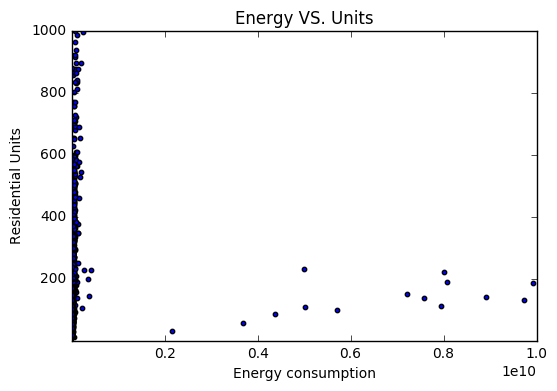

In [24]:
ax = bblnrgdata.plot.scatter(y="UnitsRes", x="nrg", s=10)
ax.set_ylim(1,1000)
ax.set_xlim(1000,1e10)
ax.set_xlabel("Energy consumption")
ax.set_ylabel("Residential Units")
ax.set_title("Energy VS. Units")
pl.show()

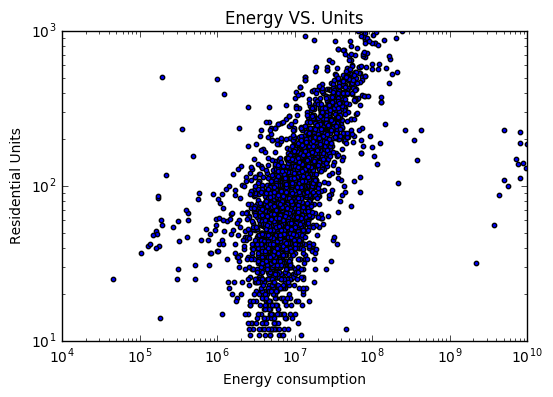

In [25]:
ax = bblnrgdata.plot.scatter(y="UnitsRes", x="nrg", s=10, loglog=True)
ax.set_ylim(10,1000)
ax.set_xlim(1e4,1e10)
ax.set_xlabel("Energy consumption")
ax.set_ylabel("Residential Units")
ax.set_title("Energy VS. Units")
pl.show()

In [26]:
# fit Units vs Energy
X = sm.add_constant(np.log10(bblnrgdata.UnitsRes))
model = sm.OLS(np.log10(bblnrgdata.nrg), X, missing='drop') 
fit_UVE = model.fit()
Y = fit_UVE.predict()
y = np.log10(bblnrgdata.nrg)
sigma = y/2 ## error term
chisq = ((y - Y)**2 / sigma**2).sum()

print ("Chi-Sqaure test result for Units vs. Energy is {}".format(chisq))

Chi-Sqaure test result for Units vs. Energy is 38.1108105813


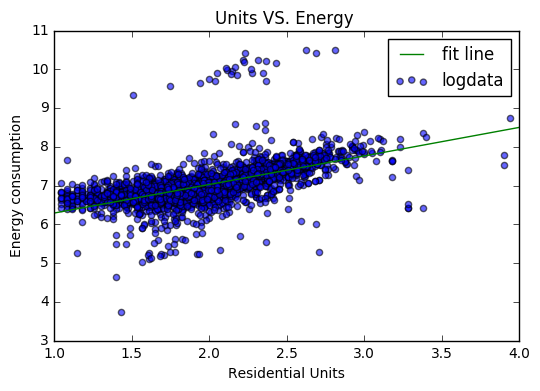

In [27]:
pl.scatter(log10(bblnrgdata.UnitsRes), log10(bblnrgdata.nrg), alpha=0.6, label="logdata")
x_line = np.linspace(1,4,1000)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, fit_UVE.predict(x_fit), 'g-', label="fit line")
pl.plot()
pl.ylabel("Energy consumption")
pl.xlabel("Residential Units")
pl.title("Units VS. Energy ")
plt.xlim([1,4])
pl.legend(loc="best")
pl.show()


In [28]:
fit_UVE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nrg   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1887.
Date:                Wed, 19 Oct 2016   Prob (F-statistic):               0.00
Time:                        22:51:08   Log-Likelihood:                -1522.2
No. Observations:                3461   AIC:                             3048.
Df Residuals:                    3459   BIC:                             3061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.5525      0.034    163.619      0.000         5.486     5.619
UnitsRes       0.7367      0.017     43.443      0.000         0.703     0.770
==============================================================================
Omnibus:                     2110.786   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96633.357
Skew:                           2.246   Prob(JB):                         0.00
Kurtosis:                      28.494   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# fit Energy vs Units.
X = sm.add_constant(np.log10(bblnrgdata.nrg))
model = sm.OLS(np.log10(bblnrgdata.UnitsRes), X, missing='drop') 
fit_EVU = model.fit()
Y = fit_EVU.predict()
y = np.log10(bblnrgdata.UnitsRes)
sigma = y/2 ## error term
chisq = ((y - Y)**2 / sigma**2).sum()

print ("Chi-Sqaure test result for Energy vs. Units is {}".format(chisq))

Chi-Sqaure test result for Energy vs. Units is 420.665629853


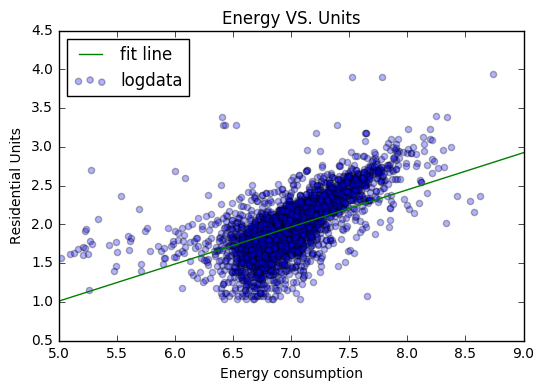

In [30]:
pl.scatter(log10(bblnrgdata.nrg), log10(bblnrgdata.UnitsRes), alpha=0.3, label="logdata")
x_line = np.linspace(5,9,1000)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, fit_EVU.predict(x_fit), 'g-', label="fit line")
pl.plot()
pl.ylabel("Residential Units")
pl.xlabel("Energy consumption")
pl.title("Energy VS. Units")
pl.legend(loc="upper left")
plt.xlim(5,9)
pl.show()


In [31]:
fit_EVU.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               UnitsRes   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1887.
Date:                Wed, 19 Oct 2016   Prob (F-statistic):               0.00
Time:                        22:51:51   Log-Likelihood:                -777.79
No. Observations:                3461   AIC:                             1560.
Df Residuals:                    3459   BIC:                             1572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.3890      0.077    -17.949      0.000        -1.541    -1.237
nrg            0.4792      0.011     43.443      0.000         0.458     0.501
==============================================================================
Omnibus:                      280.358   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1479.588
Skew:                          -0.173   Prob(JB):                         0.00
Kurtosis:                       6.184   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## As is shown in the Chi-squared test, it is better to use the Units vs. Energy

In [33]:
data = bblnrgdata[["UnitsRes","nrg"]]
data = data.applymap(np.log10)

data.head()

,UnitsRes,nrg
19,1.732394,6.950549
20,1.875061,6.811909
21,2.107210,6.860458
23,1.748188,6.919769
24,2.685742,10.415995


In [34]:
data["x2"] = data.UnitsRes**2
data.head()

,UnitsRes,nrg,x2
19,1.732394,6.950549,3.001188
20,1.875061,6.811909,3.515855
21,2.107210,6.860458,4.440334
23,1.748188,6.919769,3.056161
24,2.685742,10.415995,7.213209


In [35]:
fres = smf.ols(formula = 'nrg ~ x2 + UnitsRes', data=data).fit()
fres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nrg   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     971.1
Date:                Wed, 19 Oct 2016   Prob (F-statistic):               0.00
Time:                        22:54:50   Log-Likelihood:                -1504.3
No. Observations:                3461   AIC:                             3015.
Df Residuals:                    3458   BIC:                             3033.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.2299      0.118     52.823      0.000         5.999     6.461
x2             0.1669      0.028      5.995      0.000         0.112     0.222
UnitsRes       0.0519      0.115      0.450      0.653        -0.174     0.278
==============================================================================
Omnibus:                     2111.535   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106260.647
Skew:                           2.217   Prob(JB):                         0.00
Kurtosis:                      29.781   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

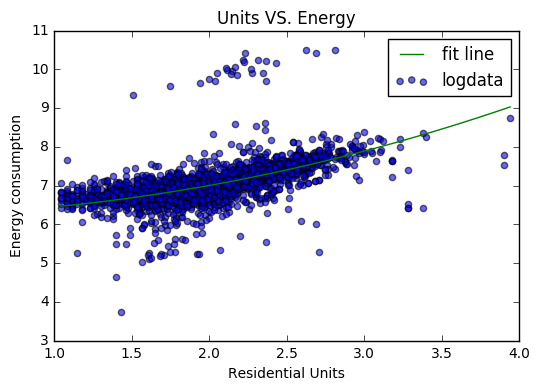

In [36]:
pl.scatter(log10(bblnrgdata.UnitsRes), log10(bblnrgdata.nrg), alpha=0.6, label="logdata")
dfnew = pd.DataFrame()
dfnew['UnitsRes'] = np.arange(log10(bblnrgdata.UnitsRes).min(), log10(bblnrgdata.UnitsRes).max(), 0.1)
dfnew['x2'] = dfnew['UnitsRes'] * dfnew['UnitsRes']
pl.plot(dfnew['UnitsRes'], fres.predict(dfnew), 'g-', label="fit line")
pl.plot()
pl.ylabel("Energy consumption")
pl.xlabel("Residential Units")
pl.title("Units VS. Energy")
plt.xlim([1,4])
pl.legend(loc="best")
pl.show()

LR = -2 * (logLikelihood_Model1 - logLikelihood_Model2)

In [37]:
LR = -2*((-1522.2) - (-1504.3))
LR

35.80000000000018

## As LR is larger than 3.84, which is the critical value for dof=1 chi-square test at alpha=0.05, we reject the null hypothesis, which means that quadratic function is better fit.

In [38]:
smf.ols(formula = 'nrg ~ x2 + UnitsRes', 
        data=data).fit().compare_lr_test(smf.ols(formula = 'nrg ~  UnitsRes', 
        data=data).fit())

(35.782882335342038, 2.2057743562761581e-09, 1.0)

## This result also allows us to reject null hypothesis, means that 2nd deg polynomial is better.

In [39]:
errors = np.log10(bblnrgdata.nrg)/2

In [41]:
def residual(a,b): 
    temp = (np.log10(bblnrgdata.nrg) - (np.log10(bblnrgdata.UnitsRes)*a+b))**2 
    return (temp/ errors**2).sum()

intercp = np.arange (-100, 100, 1)
slope =  np.arange(-50.0, 50.0, 0.5)

Lsurface = np.zeros((len(slope), len(intercp)))

vecres = np.vectorize(residual)
Lsurface = np.array([vecres(slope, i) for i in intercp]).reshape(len(slope), len(intercp))

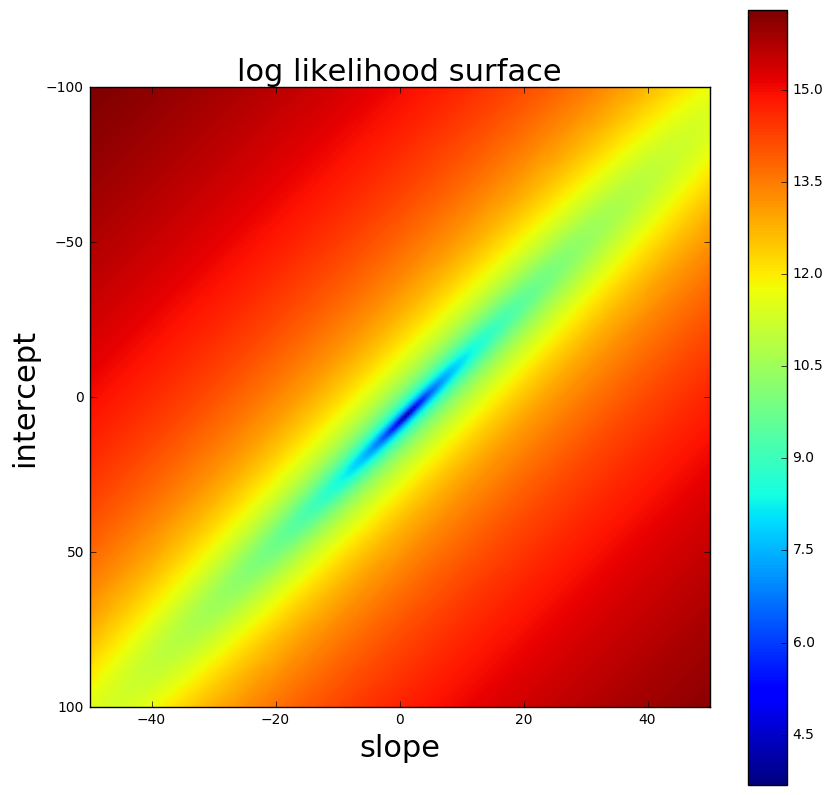

In [42]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

As is shown above, the minimum points locate around the true value from the model.¶

# Extra

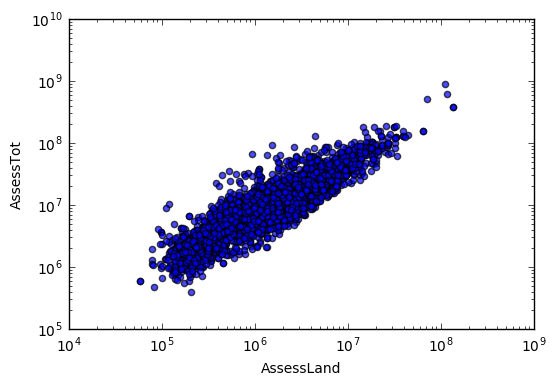

In [43]:
datacut = bblnrgdata[["AssessLand","AssessTot","BldgArea","ResArea","RetailArea"]]

datacut.plot.scatter(x="AssessLand", y="AssessTot", alpha=0.7, loglog=True)

## As is shown in the plot above, we could conclude that there exsists a linear relationship between Assess Tot and Assess Land.